In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats

from statsmodels.miscmodels.ordinal_model import OrderedModel

url = "https://stats.idre.ucla.edu/stat/data/ologit.dta"
data_student = pd.read_stata(url)

mod_prob = OrderedModel(data_student['apply'],
                        data_student[['pared', 'public', 'gpa']],
                        distr='probit')

res_prob = mod_prob.fit(method='bfgs')


Optimization terminated successfully.
         Current function value: 0.896869
         Iterations: 17
         Function evaluations: 21
         Gradient evaluations: 21


In [2]:
# Predict the probabilities for each observation in the data
predicted_probs = res_prob.predict(exog=data_student[['pared', 'public', 'gpa']], which='prob')

# Display the predicted probabilities
predicted_probs

,0,1,2
0,0.551417,0.357687,0.090896
1,0.326009,0.448882,0.225109
2,0.234969,0.450637,0.314394
3,0.614250,0.318479,0.067271
4,0.651990,0.292845,0.055165
...,...,...,...
395,0.488692,0.391843,0.119465
396,0.638661,0.302065,0.059274
397,0.688281,0.266870,0.044849
398,0.551417,0.357687,0.090896


# Plot posterior probabilities as function of product sum

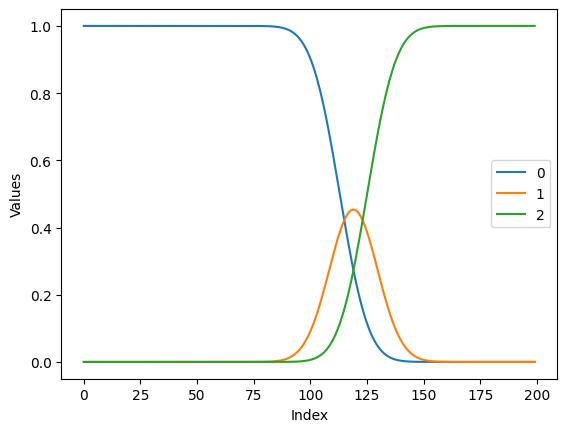

In [7]:
import numpy as np
import matplotlib.pyplot as plt

thresh = mod_prob.transform_threshold_params(res_prob.params)
xb = np.arange(-10, 10, .1)
xb = xb[:, None]
low = thresh[:-1] - xb
upp = thresh[1:] - xb
posteriors = mod_prob.prob(low, upp)

plt.plot(posteriors[:, 0], label='0')
plt.plot(posteriors[:, 1], label='1')
plt.plot(posteriors[:, 2], label='2')
plt.xlabel('Index')
plt.ylabel('Values')
plt.legend()
plt.show()